# Importing the dependencies

In [30]:
#importing the dependencies


import numpy as np                                 #numpy arrays---data & mathematical calculation
import pandas as pd                            # dataset frame--- data manipulation
from sklearn import metrics
import sklearn.datasets                              # standard library in form of numpy array whereas in kaggle it is in CSV format
from sklearn.model_selection import train_test_split  # break test and train dataset
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score           #accuracy score

In [2]:
price_house = pd.read_csv('Housing.csv')

In [3]:
print(price_house)


      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09     230

In [4]:
price_house.shape

(5000, 7)

In [5]:
price_house.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [6]:
price_house.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
price_house.columns


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# Training data using Linear Regression Model


In [8]:
X = price_house[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

Y = price_house['Price']

In [9]:
print(X)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population  
0                             4.09     23086.800503  
1  

In [10]:
print(Y)

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64


# Splitting the data into training data & test data

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(5000, 5) (3000, 5) (2000, 5)


In [13]:
print(Y.shape, Y_train.shape, Y_test.shape)

(5000,) (3000,) (2000,)


# Training the LinearRegression Model

In [14]:
model = LinearRegression()


In [15]:
model.fit(X_train,Y_train)

LinearRegression()

In [16]:
model.score(X_test,Y_test)

0.91768240096492

# Evaluation

In [20]:
model.intercept_

-2640159.79685191

In [21]:
model.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [22]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


# Predictions

In [23]:
predic = model.predict(X_test)

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

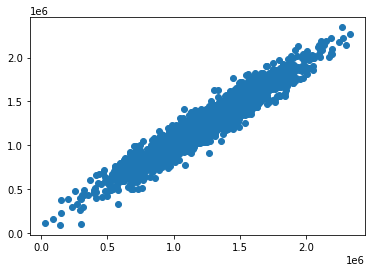

In [33]:
plt.scatter(Y_test,predic)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


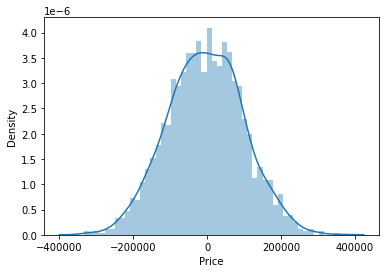

In [28]:
sns.distplot((Y_test-predic),bins=50);

In the above histogram plot, we see data is in bell shape, which means our model has done good predictions.

In [31]:
print('MAE:', metrics.mean_absolute_error(Y_test, predic))
print('MSE:', metrics.mean_squared_error(Y_test, predic))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predic)))

MAE: 82288.22251914954
MSE: 10460958907.2095
RMSE: 102278.82922291152
